## Bigram model using a Neural Network 

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [5]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [6]:
# create the training set of biagrams (x, y)
xs , ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        # N[ix1, ix2] += 1


xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [7]:
xs

tensor([ 0,  5, 13, 13,  1])

In [8]:
ys

tensor([ 5, 13, 13,  1,  0])

In [9]:
import torch.nn.functional as F 
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

In [10]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

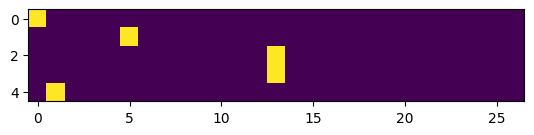

In [11]:
plt.imshow(xenc)

In [12]:
w = torch.randn((27,27))
(xenc @ w)

tensor([[-1.6032,  1.0180, -0.4837, -1.8007, -1.8144, -0.8499, -1.9622,  0.4473,
          0.4798,  0.4807, -0.3117,  0.6734, -0.5502,  0.9846,  0.6919, -0.2947,
          1.2276,  0.7094, -1.0339,  0.7753,  0.4209,  0.5758, -0.1756, -0.1250,
         -0.5255,  0.6801, -1.2057],
        [ 0.0720, -0.2319, -1.3363, -0.6863, -0.9899,  0.7867,  0.4492, -0.0146,
         -0.9969,  0.3031, -1.1894,  0.9084, -1.5123, -0.6809,  0.0475, -0.1839,
          0.0379, -0.3809, -1.5802, -0.4651, -1.2537,  0.1175,  1.3636, -0.4044,
          0.9003, -0.6352,  1.6250],
        [ 1.2743, -1.0605, -0.2277, -0.4241, -1.9743, -1.1278,  0.4209,  1.5459,
          1.1946,  0.1228, -0.2045,  1.7500,  0.3768, -0.3090, -0.2224,  0.6410,
          0.4660, -1.3774,  0.0788, -2.0866,  0.9380, -0.3246, -2.2365, -0.4174,
         -1.0568,  0.0905, -1.0935],
        [ 1.2743, -1.0605, -0.2277, -0.4241, -1.9743, -1.1278,  0.4209,  1.5459,
          1.1946,  0.1228, -0.2045,  1.7500,  0.3768, -0.3090, -0.2224,  0.6410

In [13]:
logits = (xenc @ w) #log-counts
counts = logits.exp() #equivalent N
probs = counts / counts.sum(1, keepdim=True)

In [14]:
xs

tensor([ 0,  5, 13, 13,  1])

In [15]:
ys

tensor([ 5, 13, 13,  1,  0])

In [16]:
# Initializes the weights of 27 neurons randomly, each receives 27 inputs
# 27 inputs -> 27 neurons
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [17]:
xenc = F.one_hot(xs, num_classes=27).float()

# Forward (passing) propagation
logits = xenc @ w
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

# Last 2 lines are together Softmax (activation function)
# It takes input (an output layer of floats) and convert them to probabilities
# can be applied to any NN layer

In [18]:
probs.shape

torch.Size([5, 27])

In [19]:
nlls = torch.zeros(5)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    
    print('---------------')
    print(f'biagram exampple {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    p = probs[i, y]
    logp = torch.log(p)
    print('log likelihood: ', logp.item())

    nll = -logp
    print('Negative log likelihood: ', nll.item())
    nlls[i] = nll

print('=========') 
print('Avg negative log likelihood, i.e. loss = ', nlls.mean().item())


---------------
biagram exampple 1: .e (indexes 0, 5)
log likelihood:  -4.371180534362793
Negative log likelihood:  4.371180534362793
---------------
biagram exampple 2: em (indexes 5, 13)
log likelihood:  -4.130298614501953
Negative log likelihood:  4.130298614501953
---------------
biagram exampple 3: mm (indexes 13, 13)
log likelihood:  -3.9149699211120605
Negative log likelihood:  3.9149699211120605
---------------
biagram exampple 4: ma (indexes 13, 1)
log likelihood:  -4.666500568389893
Negative log likelihood:  4.666500568389893
---------------
biagram exampple 5: a. (indexes 1, 0)
log likelihood:  -3.263277769088745
Negative log likelihood:  3.263277769088745
Avg negative log likelihood, i.e. loss =  4.069245338439941


In [20]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [21]:
# Forward Pass
logits = (xenc @ W) #log-counts
counts = logits.exp() #equivalent N
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()


In [22]:
# Backward pass
W.grad = None
loss.backward()

In [23]:
W.data += -0.1 * W.grad

In [24]:
print(loss.item())

3.7693049907684326


In [25]:
logits = (xenc @ W) #log-counts
counts = logits.exp() #equivalent N
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7492, grad_fn=<NegBackward0>)

## Optimization

In [26]:
# Create the data set
xs , ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        # N[ix1, ix2] += 1


xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('Number of examples: ', num)

# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of examples:  228146


In [27]:
# Regularization Term
(W**2).mean()

tensor(0.9665, grad_fn=<MeanBackward0>)

In [28]:
# Gradient Descent

for k in range(100):
    # Forward 
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W) #log-counts
    counts = logits.exp() #equivalent N
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 1*(W**2).mean()
    print(loss.item())

    # Backward pass
    W.grad = None
    loss.backward()

    # Update the data
    W.data += -30 * W.grad

4.72546911239624
4.2028303146362305
3.8577470779418945
3.6194915771484375
3.449573040008545
3.3243706226348877
3.230109691619873
3.158154010772705
3.1026480197906494
3.059464693069458
3.0256333351135254
2.998974084854126
2.977867364883423
2.961090087890625
2.947709083557129
2.9370062351226807
2.9284229278564453
2.9215238094329834
2.9159674644470215
2.9114837646484375
2.9078590869903564
2.904924154281616
2.9025444984436035
2.9006123542785645
2.899041175842285
2.8977625370025635
2.8967204093933105
2.895869493484497
2.8951754570007324
2.8946077823638916
2.8941433429718018
2.8937625885009766
2.8934507369995117
2.893195152282715
2.8929853439331055
2.892812490463257
2.8926708698272705
2.89255428314209
2.892458200454712
2.89237904548645
2.8923139572143555
2.892260789871216
2.892216205596924
2.892179489135742
2.8921492099761963
2.8921241760253906
2.892103672027588
2.8920867443084717
2.8920724391937256
2.8920607566833496
2.8920512199401855
2.892042875289917
2.8920364379882812
2.892030954360962


# Sampling

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

    out = []
    ix = 0
    while True:

        # p = P[ix]

        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W                           # predict log-counts
        counts = logits.exp()                       # counts, equivalent to N (count Matrix)
        p = counts / counts.sum(1, keepdim=True)    # probabilities for the next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
                
        if ix == 0:
            break

    print(''.join(out))

juwjdedianaqah.
p.
cfaywe.
nn.
kshin.
toleras.
gwzzusahnaauyanileviackdbdainrwietlesnjyievylartezffvmumthyfontumj.
pfynszwjh.
janq.
core.
